# Insurance Claims- Fraud Detection

# Problem Statement:

Business case:

* Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique     position to help the Auto Insurance industry with this problem.
 
* In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It 
  also has the details of the accident on the basis of which the claims have been made. 

* In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that   predicts if an insurance claim is fraudulent or not. 

# Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#for model building
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

#for model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder,power_transform,PowerTransformer,OrdinalEncoder,StandardScaler
from sklearn.decomposition import PCA
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [3]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
#checking shape
df.shape

(1000, 40)

There are **1000** rows and **40** columns including target variable.

In [5]:
#checking columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

**Fraud_reported** is our target variable and remaining all are independent variables.

In [6]:
#checking data types
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

**Most of the columns are object type datatypes.**

In [7]:
#lets check for null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
#Lets drop _c39 because there are total null values in  column.
df.drop('_c39',axis = 1, inplace = True)

In [9]:
#checking data after droping a column.
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


**Lets covert target column into numeric values for graphical representation**

In [10]:
#function to convert our target variable
def label(x):
    if x == 'Y':
        return 1
    else:
        return 0

In [11]:
#Lets apply the above function
df['fraud_reported'] = df['fraud_reported'].apply(label)

In [12]:
df['fraud_reported'].head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

**Lets split Categorical columns and Numerical columns for better understanding them easily**

# Categorical Columns

In [18]:
#splitting target column
df_cat=df[['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make','auto_model','auto_year','fraud_reported']]

In [19]:
df_cat.head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,auto_year,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,2004,1
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,2007,1
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,2007,0
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,2014,1
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,2009,0


In [20]:
df['incident_location'].nunique()

1000

**Here we see that incident_location have 1000 unique values and they are no use to predict target variable. Lets drop incident_location column**

In [21]:
df['auto_model'].nunique()

39

**Here auto model had 39 unique values which are no use to target column and columns will increase if encode**

In [22]:
#Dropping incident_location column
df_cat.drop(['incident_location','auto_model'],axis = 1, inplace = True)

In [23]:
#Cheking shape of new nominal dataframe
df_cat.shape

(1000, 18)

**here We can see that some columns are having values**

In [24]:
#we can see ? symbol in  1:3 ratio in this column
df_cat.police_report_available.value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [25]:
#we can see ? symbol in  1:4 ratio in this column
df_cat.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [26]:
#we can see ? symbol in  1:3 ratio in this column
df_cat.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [27]:
#lets create a list
column_with_question_mark_symbol = ['police_report_available','collision_type','property_damage']

In [28]:
#lets replace the with nan values
for i in range(len(column_with_question_mark_symbol)):
    df_cat[column_with_question_mark_symbol[i]].replace('?',np.nan,inplace= True)

In [29]:
#Now the '?' are replaced with the nan values in all the columns
for i in column_with_question_mark_symbol:
    print(i, df_cat[i].isnull().sum())

police_report_available 343
collision_type 178
property_damage 360


Now we have converted to NaN values.

**Lets remove NaN values in each column**

In [30]:
df_cat.isnull().sum()

policy_state                 0
policy_csl                   0
insured_sex                  0
insured_education_level      0
insured_occupation           0
insured_hobbies              0
insured_relationship         0
incident_type                0
collision_type             178
incident_severity            0
authorities_contacted        0
incident_state               0
incident_city                0
property_damage            360
police_report_available    343
auto_make                    0
auto_year                    0
fraud_reported               0
dtype: int64

In [31]:
df_cat['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [32]:
df_cat['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [33]:
df_cat['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [34]:
#removing NaN using mode in each column
df_cat['police_report_available'] = df_cat['police_report_available'].fillna ('NO')
df_cat['collision_type'] = df_cat['collision_type'].fillna ('Rear Collision')
df_cat['property_damage'] = df_cat['property_damage'].fillna ('NO')

In [35]:
#now lets check the value count
for i in column_with_question_mark_symbol:
    print(i,df_cat[i].value_counts())

police_report_available NO     686
YES    314
Name: police_report_available, dtype: int64
collision_type Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64
property_damage NO     698
YES    302
Name: property_damage, dtype: int64


Now the dataset is Null free dataset

# Categorical columns Graphical Representation

# Uni-variate Analysis

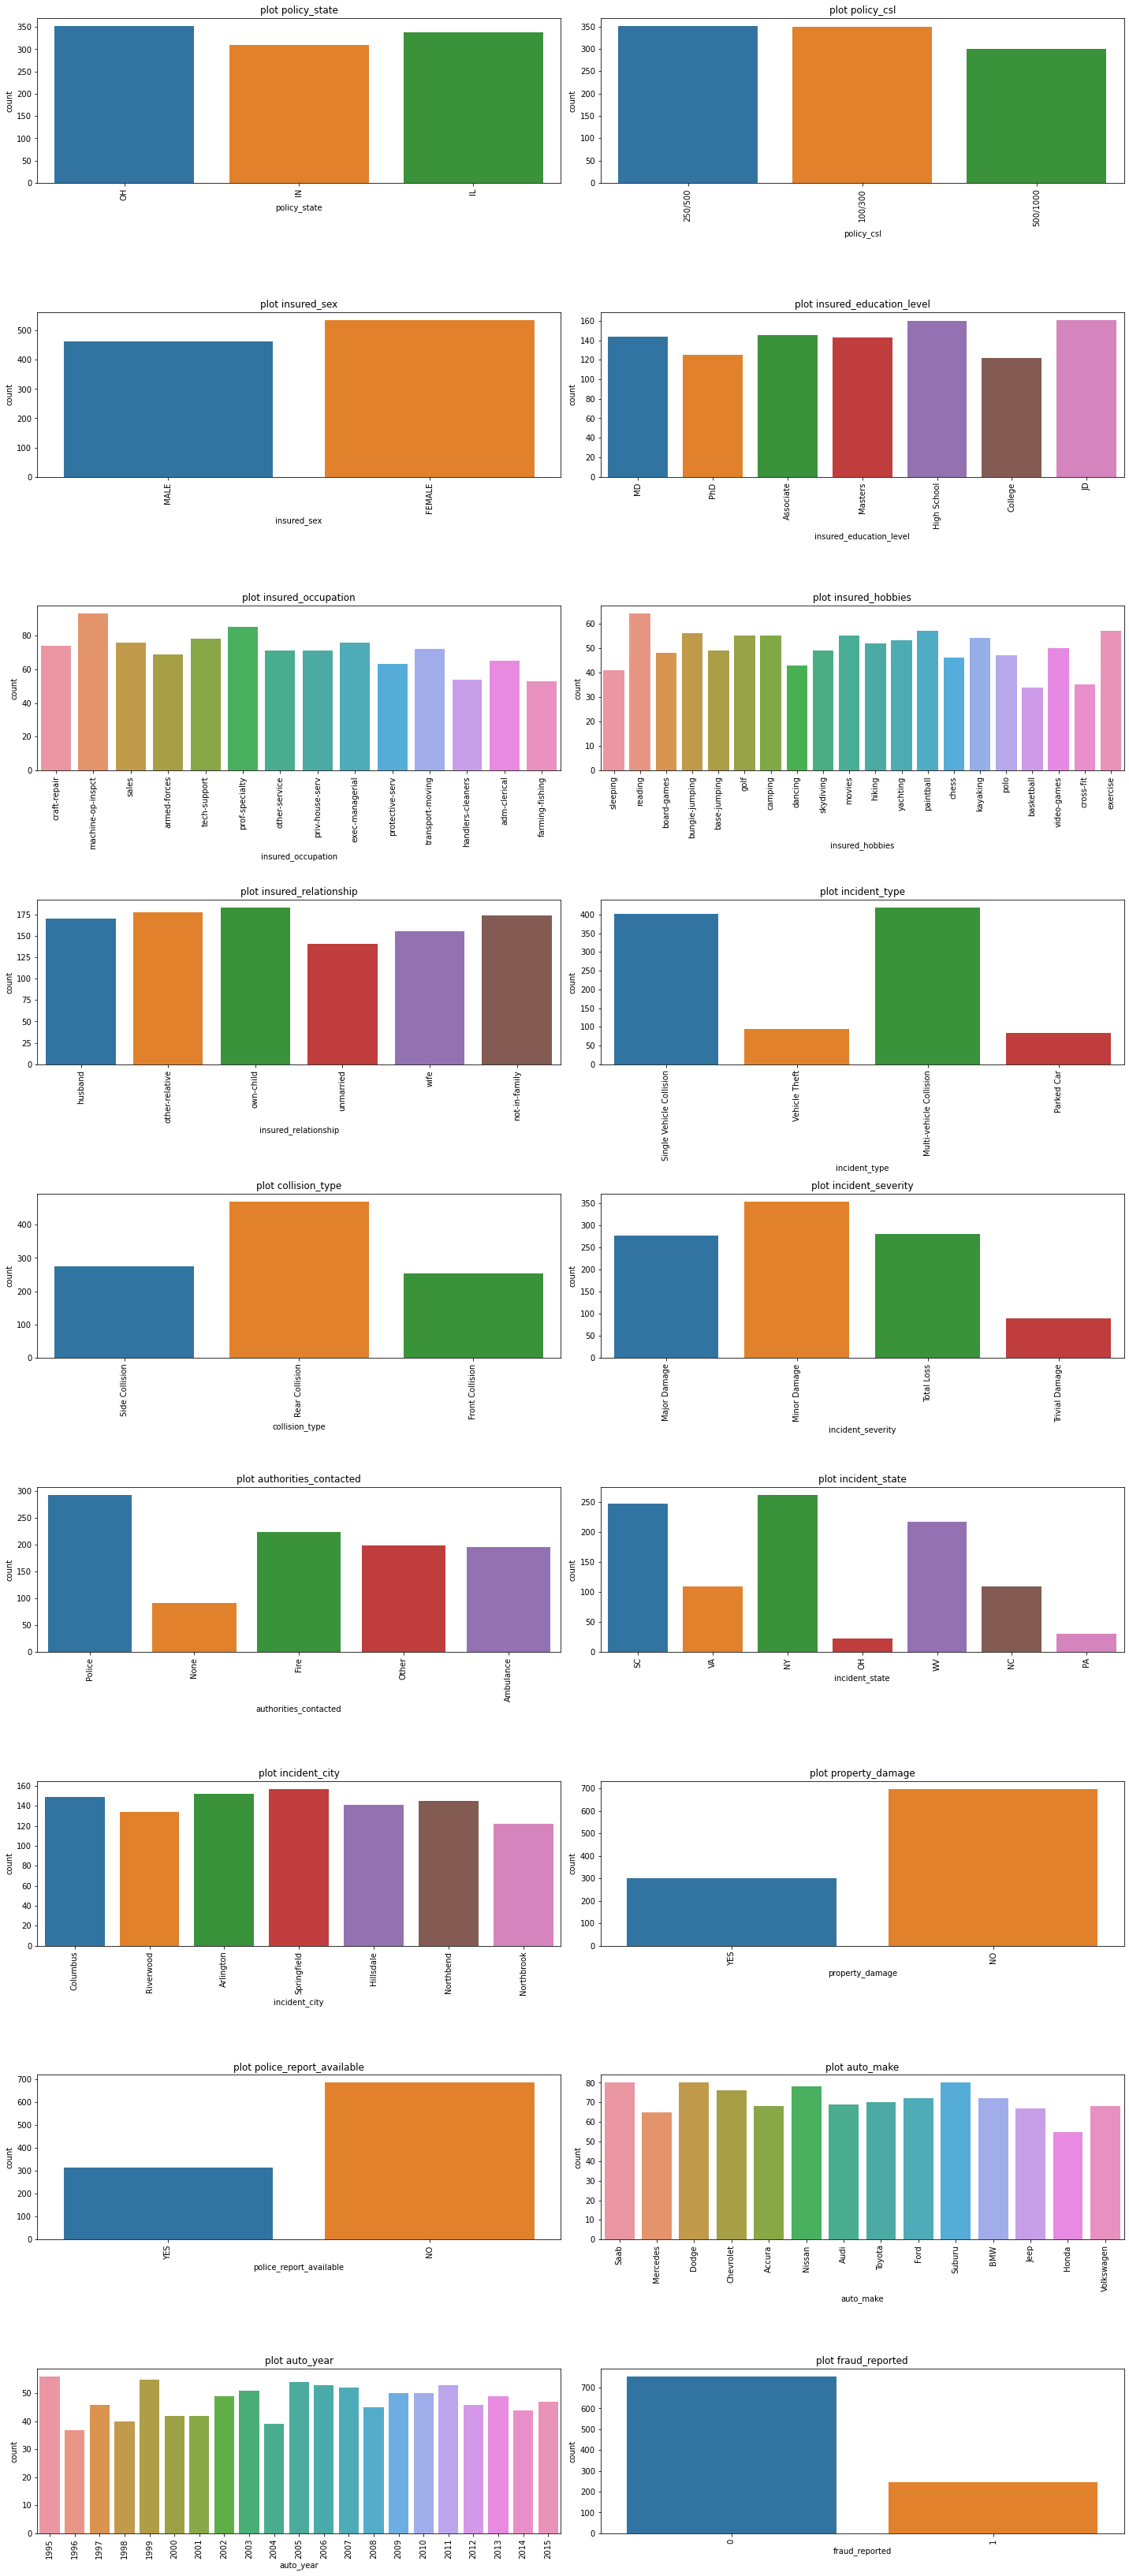

In [37]:
#Visualizing different columns using countplot
ncol,nrow=10,2
ab=df_cat.columns.values
plt.figure(figsize=(20,50))
for index,i in enumerate(ab):
    ab=plt.subplot(ncol,nrow,index+1)
    sns.countplot(df_cat[i])
    plt.title(f"plot {i}")
    plt.xticks(rotation=90)
    plt.tight_layout()
plt.show()


# Observation:
    
**policy_state:** In policy state CH is high and IN is less.

**policy_csl:** In policy csl both 250/500, 100/300 have equal values.

**insured_sex:** Here female members are highly insured than male.

**insured_education_level:** The education level with high school and JO are highly insured.

**insured_occupation:** Occupation with Machine-op-inspect got highly insured and handlers-cleaners and farming-fishing are less insured.

**insured_hobbies:** Hobbies with reading are higly insured and basketball and cross-fit are less insured.

**insured_relationship:** Members with one-child is highly insured and unmarried is less insured.

**incident_type:** Multi-vehicle and single-vehicle collisions are most cases and vehicle theft and parked car are less cases.

**collision_type:** side collision cases are high and front collision are less.

**incident_severity:** Minor damage cases are high and Trivial damage cases are less.

**authorities_contacted:** After collision the authorities contacted for police is high.

**incident_state:** In SC and NY the collission incidents are high and in CH collission incidents are less.

**incident_city:** Almost all cities have equal collision cases with slight changes.

**property_damage:** In most of the cases property damage is less.

**police_report_available:** Maximum cases the police report is not available.

**auto_make:** saab, dodge, chevrolet, nissan, suburu have high collision report and honda have less collision report.

**auto_year:** Auto Model 1995 have high collision reports and 2004 have less collision report.

**fraud_reported:** The Fraud cases are less compared to insurance claimed cases.

# Bi-variate Analysis

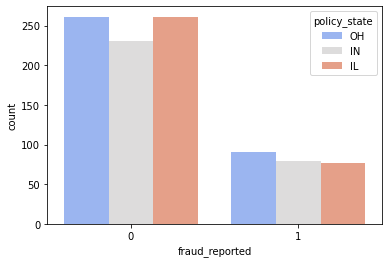

In [38]:
sns.countplot(df_cat['fraud_reported'], palette='coolwarm', hue='policy_state', data=df_cat)
plt.show()

**here we have Fraud cases are high**

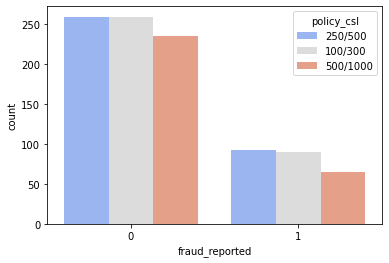

In [39]:
sns.countplot(df_cat['fraud_reported'], palette='coolwarm', hue='policy_csl', data=df_cat)
plt.show()

**policy_csl 250/500 and 100/300 have high Fraud cases**

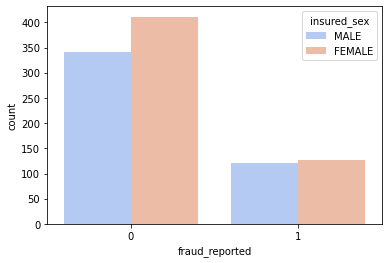

In [40]:
sns.countplot(df_cat['fraud_reported'], palette='coolwarm', hue='insured_sex', data=df_cat)
plt.show()

**almost male and female Fraud cases are equal**

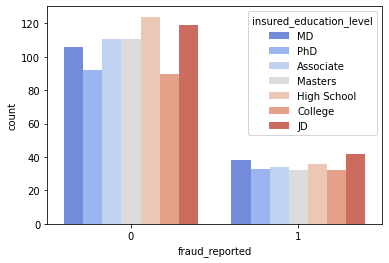

In [41]:
sns.countplot(df_cat['fraud_reported'], palette='coolwarm', hue='insured_education_level', data=df_cat)
plt.show()

**JD have highraud cases**

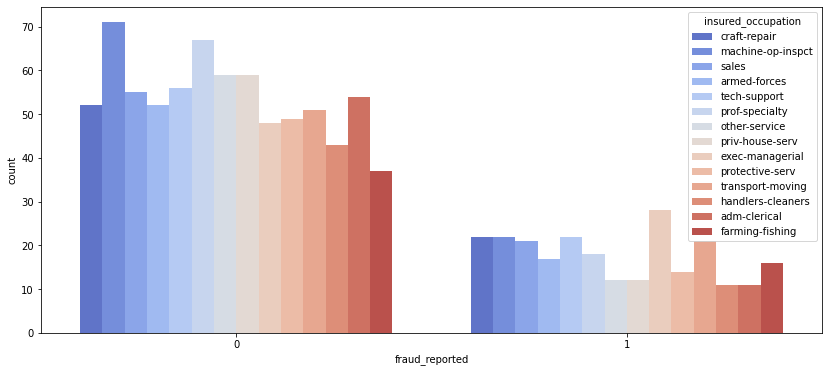

In [42]:
plt.figure(figsize= (14,6))
sns.countplot(df_cat['fraud_reported'], palette='coolwarm', hue='insured_occupation', data=df_cat)
plt.show()

**exce-managerical have high Fraud cases**

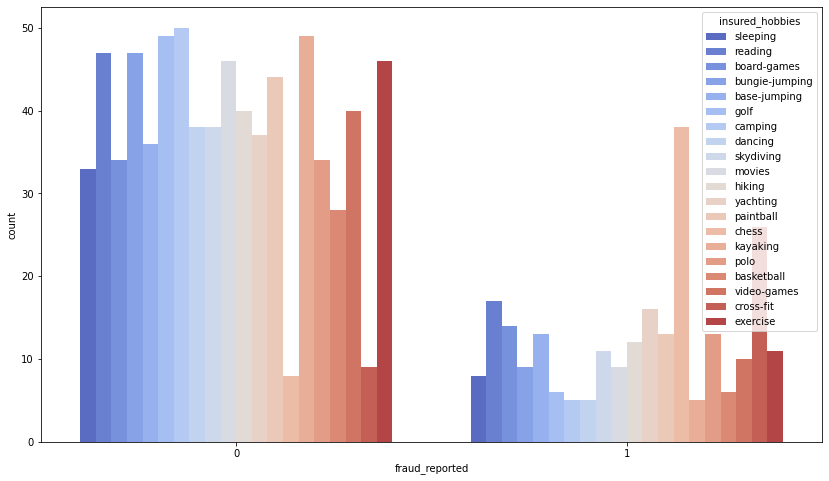

In [43]:
plt.figure(figsize= (14,8))
sns.countplot(df_cat['fraud_reported'], palette='coolwarm', hue='insured_hobbies', data=df_cat)
plt.show()

**Those who have hobby chess are done fraud**

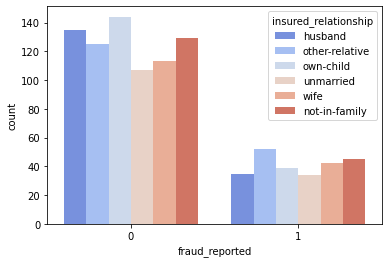

In [44]:
sns.countplot(df_cat['fraud_reported'], palette='coolwarm', hue='insured_relationship', data=df_cat)
plt.show()

**customers with other relative have high Fraud cases**

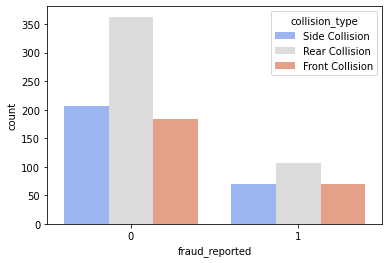

In [45]:
sns.countplot(df_cat['fraud_reported'], palette='coolwarm', hue='collision_type', data=df_cat)
plt.show()

**Rear collision have high Fraud cases**

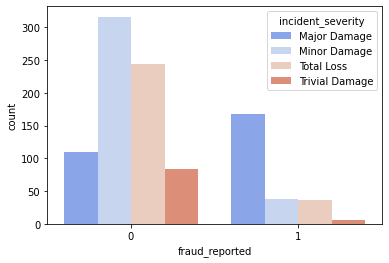

In [46]:
sns.countplot(df_cat['fraud_reported'], palette='coolwarm', hue='incident_severity', data=df_cat)
plt.show()

**Severity with Major Damange high Fraud cases**

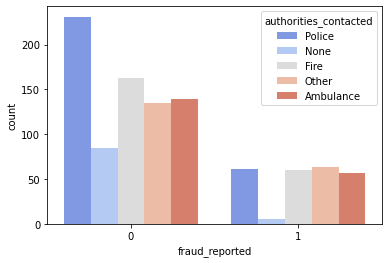

In [47]:
sns.countplot(df_cat['fraud_reported'], palette='coolwarm', hue='authorities_contacted', data=df_cat)
plt.show()

**Almost all authority contacted high Fraud cases**

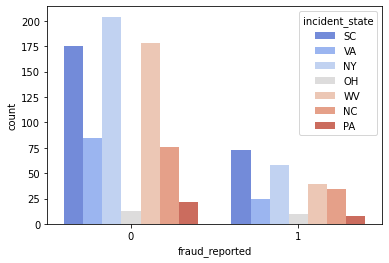

In [48]:
sns.countplot(df_cat['fraud_reported'], palette='coolwarm', hue='incident_state', data=df_cat)
plt.show()

**SC state have high Fraud cases**

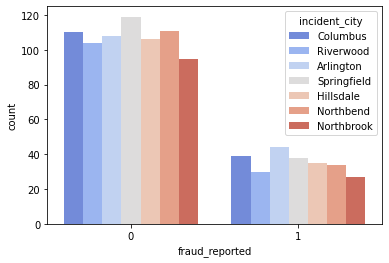

In [49]:
sns.countplot(df_cat['fraud_reported'], palette='coolwarm', hue='incident_city', data=df_cat)
plt.show()

**Arlington city have high Fraud cases**

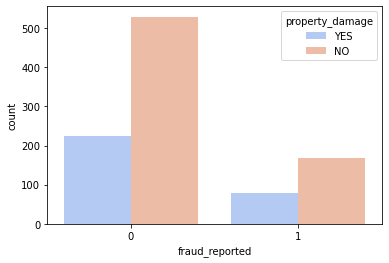

In [50]:
sns.countplot(df_cat['fraud_reported'], palette='coolwarm', hue='property_damage', data=df_cat)
plt.show()

**Property damage No have high Fraud cases**

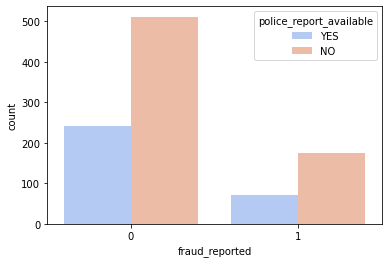

In [51]:
sns.countplot(df_cat['fraud_reported'], palette='coolwarm', hue='police_report_available', data=df_cat)
plt.show()

**Policy report available No have high Fraud cases**

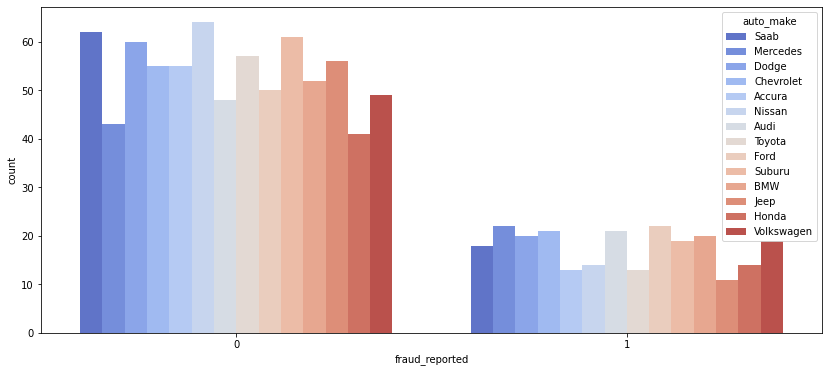

In [52]:
plt.figure(figsize= (14,6))
sns.countplot(df_cat['fraud_reported'], palette='coolwarm', hue='auto_make', data=df_cat)
plt.show()


**auto makers mercedes and Ford Fraud cases are high**

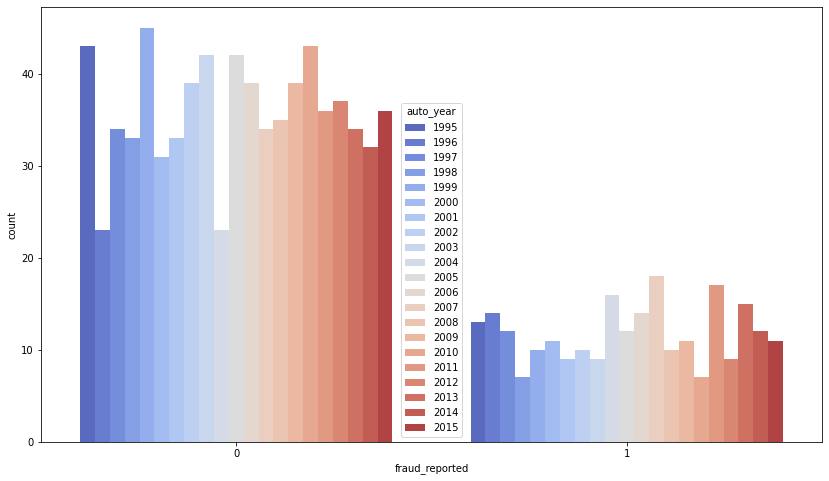

In [53]:
plt.figure(figsize= (14,8))
sns.countplot(df_cat['fraud_reported'], palette='coolwarm', hue='auto_year', data=df_cat)
plt.show()

**In 2007 the Fraud cases are high**

# Numerical Columns

In [55]:
#Copying our continuous data into a new dataframe
df_cont=df[['months_as_customer', 'age','policy_number','policy_deductable','policy_annual_premium','policy_bind_date', 'umbrella_limit','insured_zip','capital-gains','capital-loss','incident_date','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim']]

In [56]:
df_cont.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,policy_bind_date,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,521585,1000,1406.91,17-10-2014,0,466132,53300,0,25-01-2015,5,1,1,2,71610,6510,13020,52080
1,228,42,342868,2000,1197.22,27-06-2006,5000000,468176,0,0,21-01-2015,8,1,0,0,5070,780,780,3510
2,134,29,687698,2000,1413.14,06-09-2000,5000000,430632,35100,0,22-02-2015,7,3,2,3,34650,7700,3850,23100
3,256,41,227811,2000,1415.74,25-05-1990,6000000,608117,48900,-62400,10-01-2015,5,1,1,2,63400,6340,6340,50720
4,228,44,367455,1000,1583.91,06-06-2014,6000000,610706,66000,-46000,17-02-2015,20,1,0,1,6500,1300,650,4550


In [57]:
df_cont.shape

(1000, 19)

In [58]:
df_cont['policy_number'].nunique()

1000

In [59]:
# policy_number all are unique values, no use in predicting target column.

df_cont.drop('policy_number',axis = 1, inplace = True)

In [60]:
#coverting policy_bind_date column to date
df_cont['policy_bind_date'] = pd.to_datetime(df_cont['policy_bind_date'],format= '%d-%m-%Y')

In [61]:
#coverting incident_date column to date
df_cont['incident_date'] = pd.to_datetime(df_cont['incident_date'],format= '%d-%m-%Y')

In [62]:
#Lets create new column which is days between policy bind and incident date
df_cont['days_bw_policybind_and_incident'] = df_cont['incident_date'] - df_cont['policy_bind_date']

In [63]:
#lets see all three columns
df_cont.loc[:,['incident_date','policy_bind_date','days_bw_policybind_and_incident']]

,incident_date,policy_bind_date,days_bw_policybind_and_incident
0,2015-01-25,2014-10-17,100 days
1,2015-01-21,2006-06-27,3130 days
2,2015-02-22,2000-09-06,5282 days
3,2015-01-10,1990-05-25,8996 days
4,2015-02-17,2014-06-06,256 days
...,...,...,...
995,2015-02-22,1991-07-16,8622 days
996,2015-01-24,2014-01-05,384 days
997,2015-01-23,2003-02-17,4358 days
998,2015-02-26,2011-11-18,1196 days


In [64]:
#lets extract the numerical information form this column
for i in range(len(df_cont.days_bw_policybind_and_incident)):
    df_cont['days_bw_policybind_and_incident'][i] = df_cont['days_bw_policybind_and_incident'][i].days

In [65]:
#converting it into float
df_cont['days_bw_policybind_and_incident'] = df_cont['days_bw_policybind_and_incident'].astype(float)

In [66]:
df_cont['days_bw_policybind_and_incident'].dtype

dtype('float64')

In [67]:
df_cont.days_bw_policybind_and_incident.head()

0     100.0
1    3130.0
2    5282.0
3    8996.0
4     256.0
Name: days_bw_policybind_and_incident, dtype: float64

In [68]:
#now we have got useful information form policy_bind_date and incident_date  column
#lets drop these columns now
df_cont.drop(['policy_bind_date','incident_date'],axis = 1, inplace = True)

In [69]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

Here **80%** values are zero and lets drop this column

In [70]:
df['insured_zip'].value_counts()

477695    2
469429    2
446895    2
431202    2
456602    2
         ..
476303    1
450339    1
476502    1
600561    1
612260    1
Name: insured_zip, Length: 995, dtype: int64

Here **995** out of **1000** are unique values so lets drop this column.

In [71]:
#lets drop umbrella_limit,insured_zip columns
df_cont.drop(['umbrella_limit','insured_zip'],axis = 1,inplace = True)

In [72]:
df_cont.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,days_bw_policybind_and_incident
0,328,48,1000,1406.91,53300,0,5,1,1,2,71610,6510,13020,52080,100.0
1,228,42,2000,1197.22,0,0,8,1,0,0,5070,780,780,3510,3130.0
2,134,29,2000,1413.14,35100,0,7,3,2,3,34650,7700,3850,23100,5282.0
3,256,41,2000,1415.74,48900,-62400,5,1,1,2,63400,6340,6340,50720,8996.0
4,228,44,1000,1583.91,66000,-46000,20,1,0,1,6500,1300,650,4550,256.0


In [73]:
#lets check the unique values in each columns
int_to_object =['number_of_vehicles_involved','bodily_injuries','witnesses']
for i in int_to_object:
    print(df_cont[i].value_counts())

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64
0    340
2    332
1    328
Name: bodily_injuries, dtype: int64
1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


In [74]:
#we can see that these columns consists of 3 and 4 unique values, lets covert it into onject datatypes
int_to_object = ['number_of_vehicles_involved','bodily_injuries','witnesses']
for i in int_to_object:
    df_cont[i] = df_cont[i].astype('object')

In [75]:
#now they are converted into object datatype, lets check it out
int_to_object = ['number_of_vehicles_involved','bodily_injuries','witnesses']
for i in int_to_object:
    print(i,df_cont[i].dtype)

number_of_vehicles_involved object
bodily_injuries object
witnesses object


In [76]:
df_cont.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'days_bw_policybind_and_incident'],
      dtype='object')

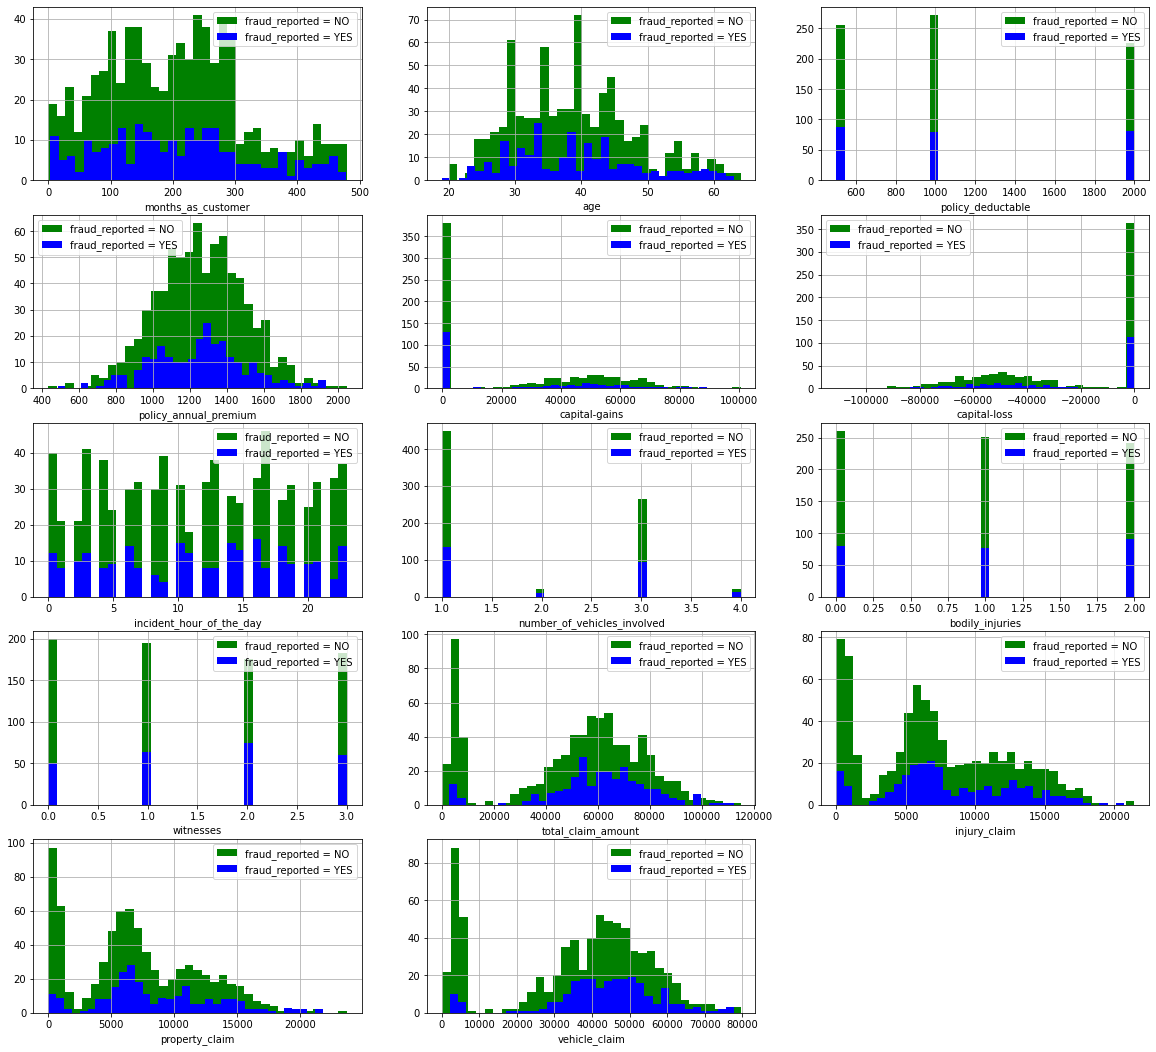

In [77]:
plt.figure(figsize=(20, 30))
numerical_columns=['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim']
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(8, 3, i)
    df[df["fraud_reported"] == 0][column].hist(bins=35, color='green', label='fraud_reported = NO', alpha=1)
    df[df["fraud_reported"] == 1][column].hist(bins=35, color='blue', label='fraud_reported = YES', alpha=1)
    plt.legend()
    plt.xlabel(column)

In almost all columns the fraud report NO is high.

**months_as_customer:** Months between 200-300 is high in both Yes and NO Fraud reported.

**age:** Age around 33 members fraud cases are high.

**policy_deductable:** In all cases the fraud cases are high.

**policy_annual_premium:** policy_annual_premium between 1200-1400 fraud cases are high.

**capital-gains:** capital-gains with zero have high fraud cases.

**capital-loss:** capital-loss with zero have high fraud cases.

**number_of_vehicles_involved:** umber_of_vehicles_involved 1 have high fraud cases.

**bodily_injuries:** All 3 cases have high fraud cases.

**witnesses:** witness 2 have high fraud cases.

**total_claim_amount:** total_claim_amount around 55000 have high fraud cases.

**injury_claim:** injury_claim between 5000-8000 have high fraud cases.

**property_claim:** property_claim around 7000 have high fraud cases.

**vehicle_claim:** vehicle_claim between 34000 to 53000 have high fraud cases.

In [78]:
df_cont.dtypes

months_as_customer                   int64
age                                  int64
policy_deductable                    int64
policy_annual_premium              float64
capital-gains                        int64
capital-loss                         int64
incident_hour_of_the_day             int64
number_of_vehicles_involved         object
bodily_injuries                     object
witnesses                           object
total_claim_amount                   int64
injury_claim                         int64
property_claim                       int64
vehicle_claim                        int64
days_bw_policybind_and_incident    float64
dtype: object

In [79]:
df_cont.nunique()

months_as_customer                 391
age                                 46
policy_deductable                    3
policy_annual_premium              991
capital-gains                      338
capital-loss                       354
incident_hour_of_the_day            24
number_of_vehicles_involved          4
bodily_injuries                      3
witnesses                            4
total_claim_amount                 763
injury_claim                       638
property_claim                     626
vehicle_claim                      726
days_bw_policybind_and_incident    953
dtype: int64

# Checking Outliers using Boxplot

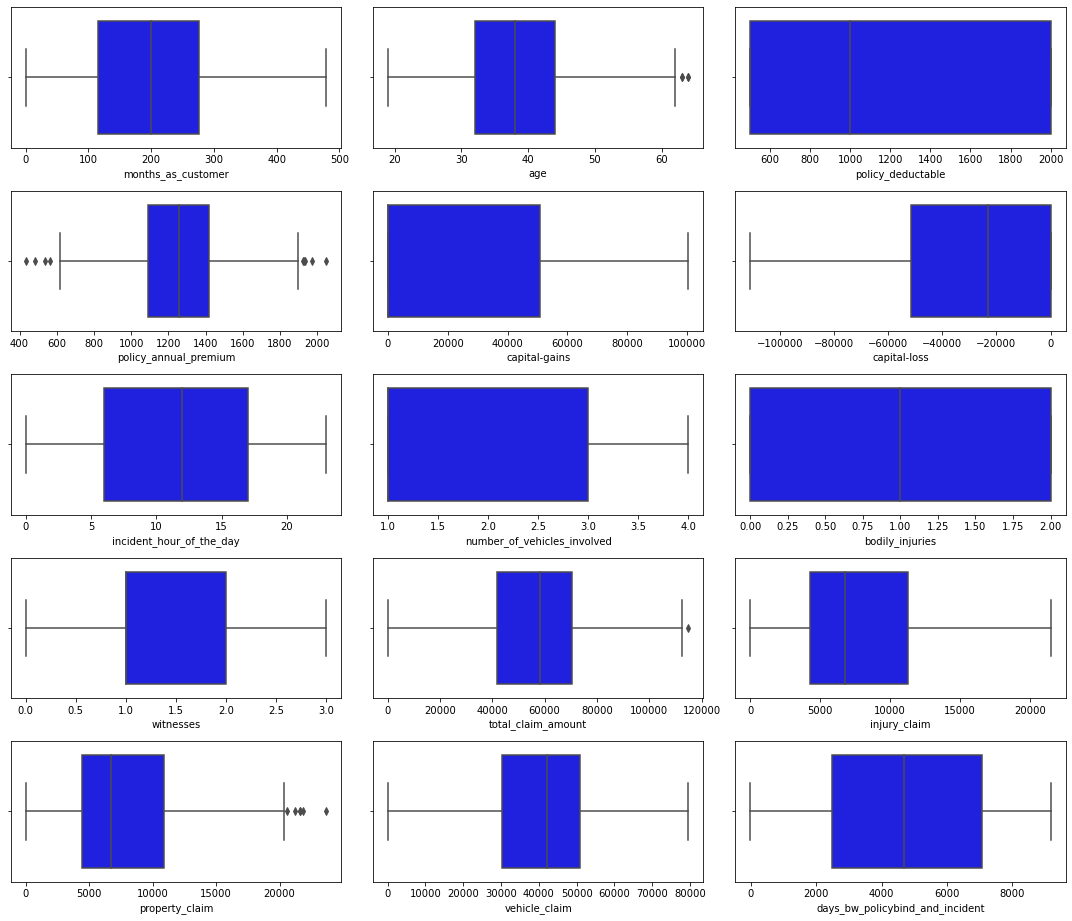

In [80]:
# lets check for outliers among all the columns Numerical columns
collist = df_cont.columns
ncol = 3
nrows = 6
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_cont[collist[i]],color='Blue',orient = 'v')
    plt.tight_layout()

# Removing Outliers

In [81]:
#Lets take columns with outliers
Numerical_columns = ['age','policy_annual_premium','total_claim_amount','property_claim',]

In [82]:
#Function of outlier Removal when data is not normal distributed or Right skewed
def outliers_IQR3(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 1.5)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 1.5)
    df_cont.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df_cont.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [83]:
##Function of outlier Removal when data looks like normal distributed.
def outliers_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    df_cont.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df_cont.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [84]:
#lets remove the outliers
for i in Numerical_columns:
    outliers_IQR3(df_cont,i)

**Now the Outliers has been removed**

# Checking Skewness

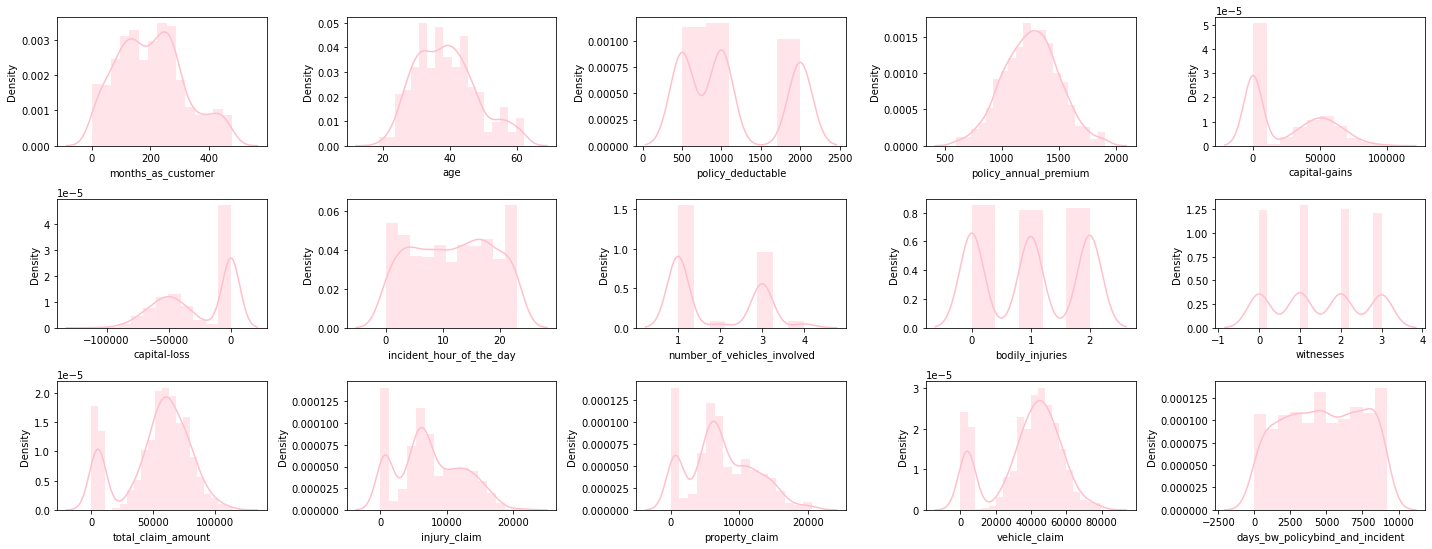

In [86]:
# Lets check the distribution
collist = df_cont.columns
ncol = 5
nrows = 10
plt.figure(figsize= (20,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df_cont[collist[i]],color='pink')
    plt.tight_layout()

**we can see that after outlier removal columns are normal distributed**

# Skewness Reduction

In [87]:
#Lest check the skewness of these numerical columns
for i in df_cont:
    if (df_cont[i].skew() > 0.5 ) or (df_cont[i].skew() < -0.5) :
        print(i, df_cont[i].skew())

number_of_vehicles_involved 0.502664087487584
total_claim_amount -0.5953507359843401
vehicle_claim -0.6210979312228687


In [89]:
#we can see that only 3 numericals columns are having skewness but number_of_vehicles_involved is almost 5 
#so let only remove skewness for total_claim_amount and vehicle_claim
#which are not very close to skewness range -0.5 to +0.5
#lets remove the skewness of these columns
df_cont['total_claim_amount'] = power_transform(df_cont['total_claim_amount'].values.reshape(-1,1))
df_cont['vehicle_claim'] = power_transform(df_cont['vehicle_claim'].values.reshape(-1,1))

# Concat the Categorical and Numerical columns

In [90]:
#creating New dataset by concating Categorical and Numerical columns after EDA
df_new=pd.concat([df_cat,df_cont],axis=1)

In [91]:
df_new

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_year,fraud_reported,months_as_customer,age,policy_deductable,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,days_bw_policybind_and_incident
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,2004,1,328,48,1000,1406.91,53300,0,5,1,1,2,0.686356,6510,13020,0.735060,100.0
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,NO,NO,Mercedes,2007,1,228,42,2000,1197.22,0,0,8,1,0,0,-1.588696,780,780,-1.592401,3130.0
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,2007,0,134,29,2000,1413.14,35100,0,7,3,2,3,-0.797227,7700,3850,-0.884542,5282.0
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,NO,NO,Chevrolet,2014,1,256,41,2000,1415.74,48900,-62400,5,1,1,2,0.289428,6340,6340,0.637447,8996.0
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,NO,NO,Accura,2009,0,228,44,1000,1583.91,66000,-46000,20,1,0,1,-1.556407,1300,650,-1.560844,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,500/1000,FEMALE,Masters,craft-repair,paintball,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,YES,NO,Honda,2006,0,3,38,1000,1310.80,0,0,20,1,0,1,1.534281,17440,8720,1.426098,8622.0
996,IL,100/300,FEMALE,PhD,prof-specialty,sleeping,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,YES,NO,Volkswagen,2015,0,285,41,1000,1436.79,70900,0,23,1,2,3,2.865860,18080,18080,2.404883,384.0
997,OH,250/500,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,NO,YES,Suburu,1996,0,130,34,500,1383.49,35100,0,4,3,2,3,0.483060,7500,7500,0.765607,4358.0
998,IL,500/1000,MALE,Associate,handlers-cleaners,base-jumping,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,NO,YES,Audi,1998,0,458,62,2000,1356.92,0,0,2,1,0,1,-0.384586,5220,5220,-0.250595,1196.0


In [92]:
df_new.shape

(1000, 33)

After EDA we have **1000** rows and **33** columns.

In [93]:
df_new.dtypes

policy_state                        object
policy_csl                          object
insured_sex                         object
insured_education_level             object
insured_occupation                  object
insured_hobbies                     object
insured_relationship                object
incident_type                       object
collision_type                      object
incident_severity                   object
authorities_contacted               object
incident_state                      object
incident_city                       object
property_damage                     object
police_report_available             object
auto_make                           object
auto_year                            int64
fraud_reported                       int64
months_as_customer                   int64
age                                  int64
policy_deductable                    int64
policy_annual_premium              float64
capital-gains                        int64
capital-los

In [94]:
#statistical summary or descriptive analysis
df_new.describe()

,auto_year,fraud_reported,months_as_customer,age,policy_deductable,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,total_claim_amount,injury_claim,property_claim,vehicle_claim,days_bw_policybind_and_incident
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,2005.103000,0.247000,203.954000,38.942000,1136.000000,1256.506126,25126.100000,-26793.700000,11.644000,3.685940e-17,7433.420000,7392.360000,4.063416e-17,4739.140000
std,6.015861,0.431483,115.113174,9.124576,611.864673,242.246335,27872.187708,28104.096686,6.951373,1.000500e+00,4880.951853,4803.547892,1.000500e+00,2686.430702
min,1995.000000,0.000000,0.000000,19.000000,500.000000,600.476250,0.000000,-111100.000000,0.000000,-1.691303e+00,0.000000,0.000000,-1.686551e+00,-20.000000
25%,2000.000000,0.000000,115.750000,32.000000,500.000000,1089.607500,0.000000,-51500.000000,6.000000,-5.651082e-01,4295.000000,4445.000000,-5.645645e-01,2484.000000
50%,2005.000000,0.000000,199.500000,38.000000,1000.000000,1257.200000,0.000000,-23250.000000,12.000000,5.158636e-02,6775.000000,6750.000000,6.768639e-02,4682.000000
75%,2010.000000,0.000000,276.250000,44.000000,2000.000000,1415.695000,51025.000000,0.000000,17.000000,6.351941e-01,11305.000000,10885.000000,6.447343e-01,7068.000000
max,2015.000000,1.000000,479.000000,62.000000,2000.000000,1904.826250,100500.000000,0.000000,23.000000,3.224517e+00,21450.000000,20545.000000,3.091441e+00,9172.000000


# Insights obtained from above Table :

**The difference between 75th percentile and max is not much, So there is presence of less outliers**

**Standard Deviation is also very less for all the columns expect target variable , Means the data is less spreaded**

**Mean and median is almost same for every column, so the data almost normal distibuted**

**There are no null values in any columns**

# Checking Correlation

In [95]:
#lets check for correlation among all the columns
df_new.corr()

,auto_year,fraud_reported,months_as_customer,age,policy_deductable,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,total_claim_amount,injury_claim,property_claim,vehicle_claim,days_bw_policybind_and_incident
auto_year,1.000000,0.007928,-0.000292,0.001513,0.026105,-0.046996,0.031398,-0.056615,0.021368,-0.035868,-0.013718,-0.013521,-0.043370,-0.014188
fraud_reported,0.007928,1.000000,0.020544,0.012287,0.014817,-0.014240,-0.019173,-0.014863,0.004316,0.148319,0.090975,0.138192,0.155685,0.000930
months_as_customer,-0.000292,0.020544,1.000000,0.922143,0.026807,0.003913,0.006399,0.020209,0.070639,0.065206,0.065329,0.037080,0.062875,0.047927
age,0.001513,0.012287,0.922143,1.000000,0.029832,0.013780,-0.007150,0.006753,0.087278,0.073452,0.075887,0.062858,0.063141,0.037033
policy_deductable,0.026105,0.014817,0.026807,0.029832,1.000000,-0.003331,0.035212,-0.023544,0.060935,0.024487,0.039107,0.065553,0.000369,0.050396
policy_annual_premium,-0.046996,-0.014240,0.003913,0.013780,-0.003331,1.000000,-0.012984,0.024453,-0.001393,0.000314,-0.019397,-0.011577,0.014501,-0.001160
capital-gains,0.031398,-0.019173,0.006399,-0.007150,0.035212,-0.012984,1.000000,-0.046904,-0.016406,0.010085,0.025934,-0.001322,0.009484,-0.042226
capital-loss,-0.056615,-0.014863,0.020209,0.006753,-0.023544,0.024453,-0.046904,1.000000,-0.025054,-0.039782,-0.046060,-0.023274,-0.035710,0.027647
incident_hour_of_the_day,0.021368,0.004316,0.070639,0.087278,0.060935,-0.001393,-0.016406,-0.025054,1.000000,0.193808,0.165768,0.179720,0.188246,-0.035873
total_claim_amount,-0.035868,0.148319,0.065206,0.073452,0.024487,0.000314,0.010085,-0.039782,0.193808,1.000000,0.802764,0.812745,0.971281,0.009280


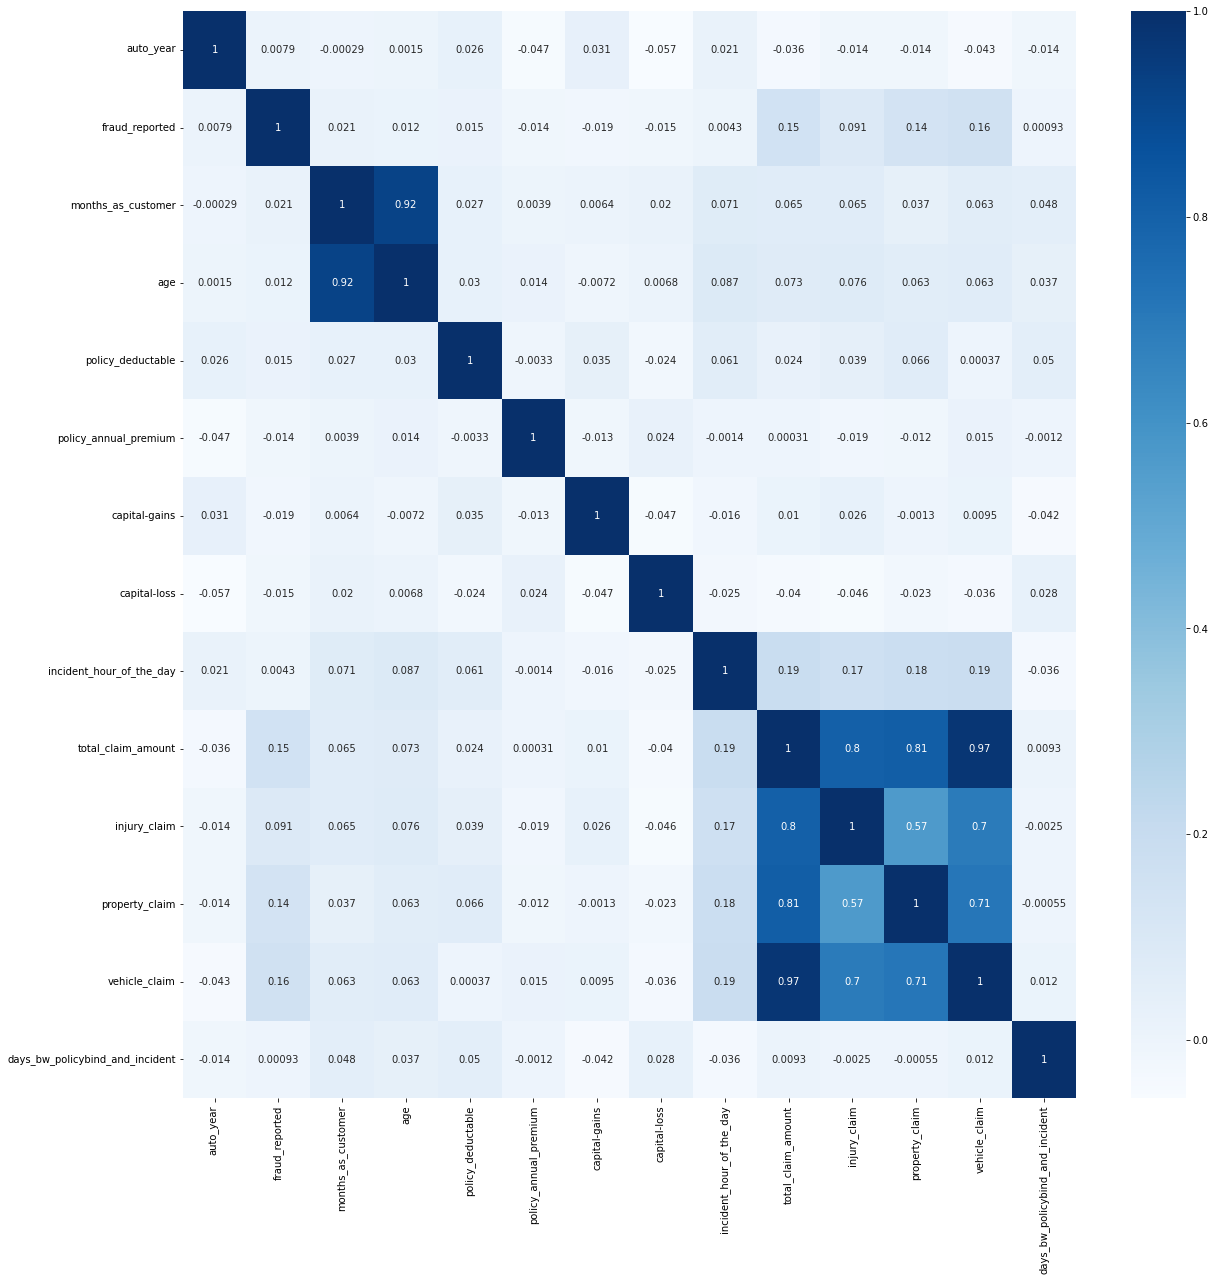

In [102]:
#correlation
fig = plt.figure(figsize=(20,20))
cor_matrix = df_new.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

In [103]:
#lets check for the correlation of input columns with Target Variable
cor_matrix['fraud_reported'].sort_values(ascending = False)

fraud_reported                     1.000000
vehicle_claim                      0.155685
total_claim_amount                 0.148319
property_claim                     0.138192
injury_claim                       0.090975
months_as_customer                 0.020544
policy_deductable                  0.014817
age                                0.012287
auto_year                          0.007928
incident_hour_of_the_day           0.004316
days_bw_policybind_and_incident    0.000930
policy_annual_premium             -0.014240
capital-loss                      -0.014863
capital-gains                     -0.019173
Name: fraud_reported, dtype: float64

# Encoding Categorical columns

In [104]:
#lets convert object columns with two unique values using ordinal encoding
for i in df_new.columns:
    if  (df_new[i].dtypes == 'object') and (len(df_new[i].unique()) == 2):
        print(i)

insured_sex
property_damage
police_report_available


In [105]:
#lets convert above 4 object columns with two unique values using ordinal encoding
o_encoding = OrdinalEncoder()
for i in df_new.columns:
    if (df_new[i].dtypes == 'object') and (len(df_new[i].unique()) == 2):
        df_new[i] = o_encoding.fit_transform(df_new[i].values.reshape(-1,1))

In [106]:
#lets print out the object columns with unique values
one_hot_columns = []
for i in df_new.columns:
    if df_new[i].dtype == 'object':
        print(i,len(pd.unique(df_new[i])))
        one_hot_columns.append(i)

policy_state 3
policy_csl 3
insured_education_level 7
insured_occupation 14
insured_hobbies 20
insured_relationship 6
incident_type 4
collision_type 3
incident_severity 4
authorities_contacted 5
incident_state 7
incident_city 7
auto_make 14
number_of_vehicles_involved 4
bodily_injuries 3
witnesses 4


In [107]:
df_new.head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_year,fraud_reported,months_as_customer,age,policy_deductable,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,days_bw_policybind_and_incident
0,OH,250/500,1.0,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1.0,1.0,Saab,2004,1,328,48,1000,1406.91,53300,0,5,1,1,2,0.686356,6510,13020,0.735060,100.0
1,IN,250/500,1.0,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,0.0,0.0,Mercedes,2007,1,228,42,2000,1197.22,0,0,8,1,0,0,-1.588696,780,780,-1.592401,3130.0
2,OH,100/300,0.0,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,0.0,0.0,Dodge,2007,0,134,29,2000,1413.14,35100,0,7,3,2,3,-0.797227,7700,3850,-0.884542,5282.0
3,IL,250/500,0.0,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,0.0,0.0,Chevrolet,2014,1,256,41,2000,1415.74,48900,-62400,5,1,1,2,0.289428,6340,6340,0.637447,8996.0
4,IL,500/1000,1.0,Associate,sales,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,0.0,0.0,Accura,2009,0,228,44,1000,1583.91,66000,-46000,20,1,0,1,-1.556407,1300,650,-1.560844,256.0


In [108]:
#we need convert the above columns one-hot encoder, since they are not ordinal values
#and also columns contains more than 2 unique values

df = pd.get_dummies(data = df_new,columns=one_hot_columns)

In [109]:
df.shape

(1000, 125)

**we have now 125 columns in this data set**

In [110]:
df.head()

,insured_sex,property_damage,police_report_available,auto_year,fraud_reported,months_as_customer,age,policy_deductable,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,total_claim_amount,injury_claim,property_claim,vehicle_claim,days_bw_policybind_and_incident,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,number_of_vehicles_involved_1,number_of_vehicles_involved_2,number_of_vehicles_involved_3,number_of_vehicles_involved_4,bodily_injuries_0,bodily_injuries_1,bodily_injuries_2,witnesses_0,witnesses_1,witnesses_2,witnesses_3
0,1.0,1.0,1.0,2004,1,328,48,1000,1406.91,53300,0,5,0.686356,6510,13020,0.735060,100.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,1.0,0.0,0.0,2007,1,228,42,2000,1197.22,0,0,8,-1.588696,780,780,-1.592401,3130.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
2,0.0,0.0,0.0,2007,0,134,29,2000,1413.14,35100,0,7,-0.797227,7700,3850,-0.884542,5282.0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,0.0,0.0,0.0,2014,1,256,41,2000,1415.74,48900,-62400,5,0.289428,6340,6340,0.637447,899

# Splitting the Dateset into X and Y

In [111]:
#Before scaling lets split our x and y columns

Y = df['fraud_reported']
x = df.drop('fraud_reported',axis = 1)

# Data Scaling:

In [112]:
#Lets scale the data using standard scaler
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(x),columns= x.columns)
scaled_X.head()

,insured_sex,property_damage,police_report_available,auto_year,months_as_customer,age,policy_deductable,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,total_claim_amount,injury_claim,property_claim,vehicle_claim,days_bw_policybind_and_incident,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,number_of_vehicles_involved_1,number_of_vehicles_involved_2,number_of_vehicles_involved_3,number_of_vehicles_involved_4,bodily_injuries_0,bodily_injuries_1,bodily_injuries_2,witnesses_0,witnesses_1,witnesses_2,witnesses_3
0,1.076953,1.520282,1.478078,-0.183440,1.078140,0.993200,-0.222383,0.621182,1.011331,0.953851,-0.956261,0.686356,-0.189283,1.172145,0.735060,-1.727743,-0.714545,-0.670280,1.356801,-0.732187,1.359780,-0.654654,-0.411814,-0.372763,-0.436436,-0.438058,2.438123,-0.408486,-0.377964,-0.263664,-0.272239,3.537444,-0.286794,-0.236572,-0.238919,-0.320212,-0.276453,-0.276453,-0.304789,-0.259299,-0.286794,-0.290859,-0.278543,-0.226991,-0.187608,-0.224544,-0.243561,-0.241249,-0.219586,-0.190445,-0.211972,-0.245856,-0.241249,-0.234206,-0.238919,-0.241249,-0.245856,-0.222076,-0.261488,-0.226991,4.836346,-0.229416,-0.236572,2.209605,-0.45897,-0.463753,-0.473276,-0.405147,-0.42829,-0.849218,-0.302825,1.217123,-0.322107,-0.583509,-0.941697,1.619626,1.619626,-0.740262,-0.62361,-0.314485,-0.493742,-0.535725,-0.316402,-0.496873,1.557131,-0.351562,-0.595830,-0.153432,-0.175863,1.741338,-0.351562,-0.52644,-0.423374,2.389856,-0.405147,-0.411814,-0.372763,-0.393363,-0.431555,-0.270114,-0.272239,-0.278543,-0.286794,-

In [113]:
#we need to use pca becuase we have 124 columns in this dataset which is very high
#we should always use scaled data for performing the PCA
#we have 124 columns excluding target variable
scaled_X.shape

(1000, 124)

# PCA (Principal Component Analysis)

In [114]:
#first lets TEST out percentage of data that we will obtain after PCA
testpca = PCA()
test_x = testpca.fit(scaled_X)

In [115]:
#now lets out cumulative score 
cum_score = np.cumsum(test_x.explained_variance_ratio_)*100
cum_score  

array([  5.0391347 ,   7.8025143 ,   9.56421509,  11.15310531,
        12.7003219 ,  14.24077714,  15.72600908,  17.18858792,
        18.63305515,  20.05735865,  21.46548258,  22.84951841,
        24.20214073,  25.5449791 ,  26.88144796,  28.18253879,
        29.46363475,  30.7348629 ,  31.99505348,  33.22866168,
        34.45453818,  35.65451567,  36.84537545,  38.02936987,
        39.1989349 ,  40.3522348 ,  41.48827924,  42.61508334,
        43.7317888 ,  44.83911238,  45.93503486,  47.02372965,
        48.09060384,  49.14924296,  50.19978415,  51.24447078,
        52.26783766,  53.27938236,  54.28114455,  55.27694483,
        56.26315422,  57.23896288,  58.19577842,  59.147972  ,
        60.09969365,  61.0322838 ,  61.94837466,  62.85207973,
        63.74648155,  64.63712191,  65.52144039,  66.39634588,
        67.25316435,  68.10623753,  68.95149371,  69.78734281,
        70.61822658,  71.43957497,  72.25955043,  73.06615093,
        73.86639438,  74.66245964,  75.44454381,  76.22

In [116]:
#lets check how many columns gives 95% of variance
s = np.argmax(cum_score > 95)
print("Number of components expaining 95% of variance is :", s)

Number of components expaining 95% of variance is : 92


In [117]:
#lets check how many columns gives 90% of variance
s = np.argmax(cum_score > 90)
print("Number of components expaining 95% of variance is :", s)

Number of components expaining 95% of variance is : 84


**so lets take 95% data which is equlivalent to 92 columns**

**From 124 columns , we reduced it to 92 columns using PCA**

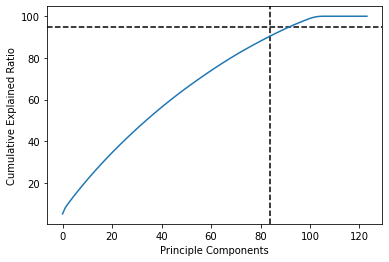

In [119]:
#lets plot the graph for graphical understanding
plt.ylabel('Cumulative Explained Ratio')
plt.xlabel('Principle Components')

plt.axvline(x = s, color = 'k', linestyle = '--')
plt.axhline(y = 95, color = 'k', linestyle = '--')

plt.plot(cum_score)
plt.show()

**From the above plot we can see that for 92 columns 95% of data will be retrived**

In [120]:
#lets perform the PCA with 92 columns
Final_pca = PCA(n_components= 92)

pca_x = pd.DataFrame(Final_pca.fit_transform(scaled_X))

In [121]:
#lets create a datafram
pca_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91
0,-1.217190,1.674986,0.674462,2.839298,0.130918,-1.463702,-2.317932,0.488081,0.036542,-1.610580,1.585893,-1.437907,-1.097880,-0.260538,-0.242534,0.419591,2.232071,-0.274385,-0.632755,1.344701,-0.978271,0.405112,-2.314857,-0.513027,-0.282353,-0.703055,0.868904,0.886053,-0.885027,1.979057,1.223019,1.384759,-0.309482,-2.060481,0.994610,-0.654332,-0.449404,-0.839591,-1.076034,2.172657,-0.961243,0.613947,0.012453,-0.949639,0.596820,1.512192,0.304443,2.005067,2.107606,-1.390701,-1.334743,0.457969,0.221747,-0.122469,0.259028,-0.386552,0.526096,0.578250,0.172858,-1.137350,-0.741819,-2.136809,-0.649186,1.320425,-0.373509,-0.742644,-0.544708,0.028925,0.365932,1.545229,1.139877,-0.402560,-1.440236,0.133250,0.345833,0.539560,0.373247,-0.867229,-0.834917,-0.377077,-0.345919,0.491335,-0.441633,1.070756,0.977419,0.039776,0.394239,-1.569948,-0.133463,0.693773,0.699528,1.132802
1,4.071070,-0.053718,1.337833,-0.800612,0.126863,-0.473779,0.789907,0.175636,-1.880367,1.943895,0.412774,-1.333123,0.800219,-0.071205,1.590266,0.056465,0.265423,-0.628390,2.064302,0.250255,-0.203273,-1.433175,0.170723,-2.029111,-0.212718,-0.568150,0.213168,-1.663211,0.860767,-0.934888,-1.969815,-0.147225,-0.885451,1.466466,-0.936030,-0.608294,1.771718,0.377798,0.569966,1.055904,-0.732937,0.011370,0.768058,-0.484599,0.820300,0.372649,0.417498,0.682261,1.266058,-1.887747,-0.718582,0.293383,-0.473110,-0.442950,-2.866928,-0.243928,0.826620,0.194989,-1.219159,-0.483171,-1.791620,-2.261775,-1.860609,0.584417,-1.312506,-0.458583,0.920951,0.140715,-0.507198,-0.765641,1.092121,0.060785,0.305445,-0.667538,-0.451194,0.032840,-0.390000,-0.251325,0.323063,-1.356766,1.612642,0.632840,-0.624922,0.177223,-1.715721,-0.014868,-0.765053,2.126991,-0.307201,1.402826,-0.683199,-0.330020
2,0.530150,-2.608740,0.193062,0.327291,-0.403938,-0.435302,-0.098845,-0.763110,-1.209524,-0.501146,-0.982928,1.143962,1.253444,1.125337,-1.734525,-1.115914,-1.034980,-0.690919,-0.866589,1.685729,1.541013,-2.138675,0.103823,0.202439,-1.692699,-3.539763,-0.854462,-0.089639,0.901195,-0.962613,0.523887,1.667955,-0.071692,-2.635369,-0.065727,0.400875,0.557226,-2.001080,0.205595,0.298065,-0.910742,-0.014313,-1.038280,-0.189484,-1.144580,-1.139478,-0.641970,-0.331399,0.434607,0.086934,0.155343,0.498866,0.253827,0.195988,0.567426,2.492257,0.718795,0.142426,0.216522,-1.045430,-0.806387,1.281720,0.220562,-0.039725,-0.061799,0.028804,1.075730,0.456944,0.461137,1.508203,-1.809069,0.849380,1.336584,0.766121,1.044986,-1.557330,-0.816331,-0.106311,0.653184,-0.305317,1.533532,-0.527305,-0.437131,0.219513,-1.123206,0.559468,0.662249,0.674102,-0.121070,-0.625772,0.283495,0.254468
3,-0.152868,1.629734,0.923422,0.176120,-2.243516,-2.146661,-2.574604,-0.442938,0.724239,-1.808585,-0.169378,3.773751,-0.276663,-0.132961,1.214883,0.587076,0.073335,3.523804,0.200032,0.397530,1.685800,-1.644788,-0.444843,1.454387,0.155363,-1.947746,3.561173,-0.189786,1.364041,0.934295,-2.621445,-0.725217,-1.115111,-0.449391,0.861140,1.434613,-0.533442,0.618015,-0.756367,0.100453,-1.797122,-0.925269,0.686363,0.042332,-1.507932,-1.006360,-0.734783,-0.849738,0.799435,0.250093,0.189614,-2.424846,0.418094,-0.220243,-1.196577,1.355431,-0.553267,1.673056,0.078899,0.291297,0.461887,0.132744,1.653742,-0.405208,-0.752372,-0.999664,-0.625388,0.361258,1.817160,-0.183388,1.450422,0.526803,3.046931,1.247062,-0.102495,-1.085926,-0.106333,-0.278375,-1.504598,0.788905,0.738068,0.799282,0.126629,1.451346,0.625420,0.146193,-0.394372,0.066107,0.358246,-0.012598,0.908461,0.012328
4,4.641034,-0.387958,1.796279,-0.480317,-1.274718,0.808373,-0.296419,1.368783,-1.425378,1.727313,-0.711915,1.038487,-1.171206,0.939640,0.228083,-0.062997,-0.636757,2.013403,-1.541338,0.821405,0.665934,-0.913888,1.464634,0.752894,0.2124

In [122]:
#we already saw the class imbalance problem in this dataset
Y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

# Handling class Imbalance problem using SMOTE method

In [123]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(pca_x, Y)

y_sm.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

# Lets Check for Best Random State

In [124]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=.30,random_state=i,stratify= y_sm)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"n Random_state",maxRS)

Best accuracy is 0.8849557522123894 n Random_state 169


We have found best random_state value as 169. We will create our train_test_split using random_state(169)

# Creating model

In [125]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=.33,random_state= 169, stratify= y_sm )

In [126]:
#now we don't have the class imbalance problem
y_train.value_counts()

0    505
1    504
Name: fraud_reported, dtype: int64

# Model selection:

In [127]:
models=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]
least_difference = []
for m in models:
    print('\n')
    print(m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    accu = accuracy_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('The accuracy of {} is {}'.format(m,accu))
    cv = cross_val_score(m,x_sm,y_sm,cv =5)
    print("cross val score :",  cv.mean())
    difference = np.abs(accuracy_score(y_test,pred) - cv.mean())
    a = 'difference b/w accurancy score and cross val score is : {:.2f}'.format(difference)
    print(a)
    least_difference.append((m,a))
    for i in ([0,1]):
        f1 = f1_score(y_test,pred,pos_label=i)
        print("f1 score for {} is {} ".format(i,f1))



LogisticRegression()
[[213  35]
 [ 34 215]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       248
           1       0.86      0.86      0.86       249

    accuracy                           0.86       497
   macro avg       0.86      0.86      0.86       497
weighted avg       0.86      0.86      0.86       497

The accuracy of LogisticRegression() is 0.8611670020120724
cross val score : 0.8612461772018218
difference b/w accurancy score and cross val score is : 0.00
f1 score for 0 is 0.8606060606060606 
f1 score for 1 is 0.8617234468937875 


SVC()
[[224  24]
 [ 15 234]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       248
           1       0.91      0.94      0.92       249

    accuracy                           0.92       497
   macro avg       0.92      0.92      0.92       497
weighted avg       0.92      0.92      0.92       497

The accuracy of SVC() is 0.921529175

In [128]:
#Lets check the least difference between cross val score and Accuracy score
least_difference

[(LogisticRegression(),
  'difference b/w accurancy score and cross val score is : 0.00'),
 (SVC(), 'difference b/w accurancy score and cross val score is : 0.01'),
 (GaussianNB(),
  'difference b/w accurancy score and cross val score is : 0.00'),
 (DecisionTreeClassifier(),
  'difference b/w accurancy score and cross val score is : 0.02'),
 (KNeighborsClassifier(),
  'difference b/w accurancy score and cross val score is : 0.01'),
 (RandomForestClassifier(),
  'difference b/w accurancy score and cross val score is : 0.03'),
 (AdaBoostClassifier(),
  'difference b/w accurancy score and cross val score is : 0.01'),
 (GradientBoostingClassifier(),
  'difference b/w accurancy score and cross val score is : 0.01'),
 (BaggingClassifier(),
  'difference b/w accurancy score and cross val score is : 0.00')]

since **KNeighborsClassifier** is having diffrence of 0.00 which is very close,so there is no overfitting in this model.Lets choose model with most accuracy.**KNeighborsClassifier** is having hishest accurancy of 91%.so lets choose **KNeighborsClassifier** as our final model.

# Hyper Tuning the Model

In [129]:
from sklearn.model_selection import GridSearchCV
#giving parameters for tuning
KNN_parameters={'n_neighbors':np.arange(1, 16),
            'weights':('uniform', 'distance'),
            'algorithm':('auto','ball_tree','kd_tree','brute')}

In [130]:
KNN=GridSearchCV(KNeighborsClassifier(),KNN_parameters,cv=5)

In [131]:
KNN.fit(x_train,y_train) #tuning the RFC model

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'weights': ('uniform', 'distance')})

In [133]:
KNN.best_params_ #finding best parameters

{'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}

In [134]:
final_model =KNeighborsClassifier(algorithm= 'auto', n_neighbors= 2,weights='uniform')
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
accu =accuracy_score(y_test,pred)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('The accuracy of {} is {}'.format(final_model,accu))
cv = cross_val_score(final_model,x_sm,y_sm,cv =5)
print('\n')
print("cross val score :",  cv.mean())
diffrence = np.abs(accuracy_score(y_test,pred) - cv.mean())
least_difference.append((final_model,difference))
print('\n')
print('diffrence b/w accurancy score and cross val score is :',diffrence)
for i in ([0,1]):
    f1 = f1_score(y_test,pred,pos_label=i)
    print("f1 score for {} is {} ".format(i,f1))

[[139 109]
 [ 13 236]]
              precision    recall  f1-score   support

           0       0.91      0.56      0.70       248
           1       0.68      0.95      0.79       249

    accuracy                           0.75       497
   macro avg       0.80      0.75      0.74       497
weighted avg       0.80      0.75      0.74       497

The accuracy of KNeighborsClassifier(n_neighbors=2) is 0.7545271629778671


cross val score : 0.7842027678158896


diffrence b/w accurancy score and cross val score is : 0.02967560483802245
f1 score for 0 is 0.6950000000000001 
f1 score for 1 is 0.7946127946127947 


**Now our score incresed by 75% after hyperparameter Tuning**

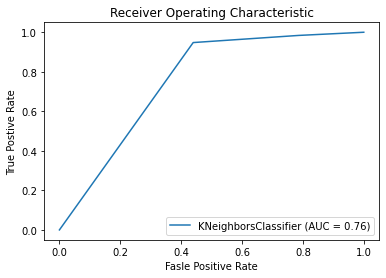

In [135]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(final_model,x_test,y_test)
plt.title("Receiver Operating Characteristic")
plt.xlabel("Fasle Positive Rate")
plt.ylabel("True Postive Rate")
plt.show()

# Saving the model

In [136]:
#serialization using joblib
import joblib
joblib.dump(final_model,'Fraud_Insurance.obj')

['Fraud_Insurance.obj']

In [137]:
Fraud_Insurance = joblib.load('Fraud_Insurance.obj')

In [138]:
accuracy_score(Fraud_Insurance.predict(x_test),y_test)

0.7545271629778671

# Conclusion

In [139]:
#lets make a dataframe of actual answers vs predicted answers
conclusion = pd.DataFrame((Fraud_Insurance.predict(x_test)[:],y_test[:]),index= ['Predicted','Actual'])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496
Predicted,0,1,0,1,1,1,1,0,1,1,0,1,1,1,0,1,0,0,0,0,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,1,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,0,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,0,1,0,1,0,1,1,1,0,0,1,0,1,1,0,0,0,1,1,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,1,1,1,0,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,0,0,1,0,0,1,0,0,1
Actual,0,1,1,1,1,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,1,0,0,0,1,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,0,0,0,1,1,1,1,0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,1,1,0,1,0,1,1,0,1,1,0,0,0,0,1,1,0,1,1,0,1,1,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,1,1,0,1,0,0,1,1,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,1,1,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,0,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,0,1,0,0,1,0,0,1
